In [1]:
%load_ext tensorboard
%load_ext autoreload
%autoreload 2

In [30]:
import numpy as np
import tensorflow as tf
from keras.utils.tf_utils import set_random_seed
import matplotlib.pyplot as plt
import matplotx
from absl_extra import setup_logging
import temporal_fusion_transformer as tft


setup_logging(log_level="ERROR")
set_random_seed(42)
plt.style.use(matplotx.styles.duftify(matplotx.styles.dracula))
tf.__version__

'2.12.0'

Model + Target Scaler = Inference Service

In [31]:
model = tft.make_tft_model(
    tft.experiments.electricity_experiment,
    num_attention_heads=4,
    hidden_layer_size=60,
    num_stacks=4,
    pretrained_weights_path="../weights/electricity/weights_v1",
)
target_scaler = tft.experiments.electricity_experiment.make_target_scaler("../datasets")
inference_service = tft.InferenceService(model, target_scaler, batch_size=32)

Load test split, make sure we do prediction for 1 entity.

In [50]:
test_ds = (
    tf.data.Dataset.load("../datasets/electricity/test")
    .filter(lambda i: i["identifier"][0] == "MT_001")
    # total number of elements.
    .batch(53505)
    .as_numpy_iterator()
    .next()
)
tf.nest.map_structure(np.shape, test_ds)

{'identifier': (145, 1),
 'time': (145, 192, 1),
 'outputs': (145, 192, 1),
 'inputs_static': (145, 1),
 'inputs_known_real': (145, 192, 3)}

Plot predictions

5/5 [==============================] - 5s 317ms/step


/Users/artemsereda/Documents/IdeaProjects/temporal_fusion_transformer/temporal_fusion_transformer/src/inference.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator
  


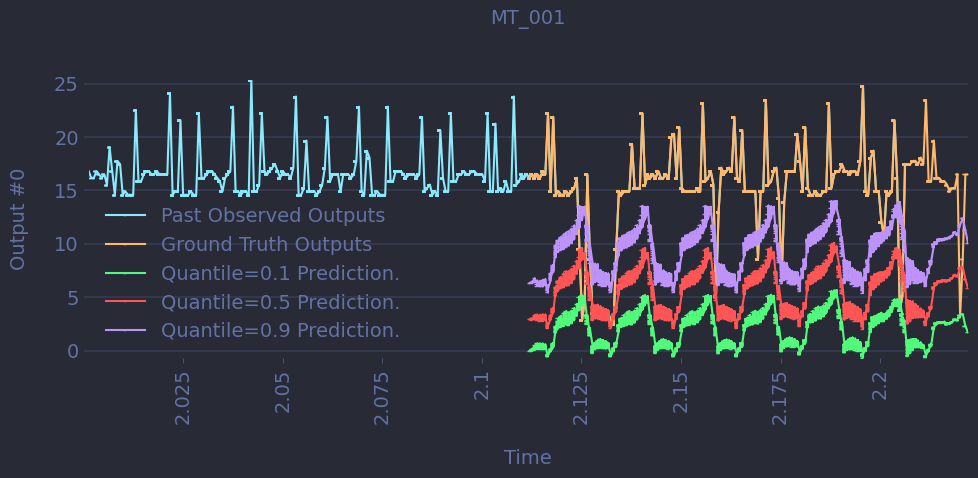

In [51]:
inference_service.plot_predictions_for_entity(
    test_ds, "MT_001", fig_axs_factory=lambda: plt.subplots(1, 1, figsize=(10, 5))
)
plt.show()